# Stock Index Creation and Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.2f}'.format

## Data Import, Visualization and Normalization

In [141]:
stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     start = "2014-01-01", end = "2018-12-31").Close

[*********************100%***********************]  6 of 6 completed


In [142]:
stocks

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,116.81,69.34,112.50,28.72,31.06
2014-01-03,19.82,117.62,69.19,113.18,28.58,30.85
2014-01-06,19.68,118.30,68.93,112.79,28.45,30.20
2014-01-07,19.90,120.09,69.40,115.04,28.53,30.43
2014-01-08,20.10,120.35,68.38,113.98,28.22,29.89
...,...,...,...,...,...,...
2018-12-21,68.87,295.93,101.71,80.20,39.49,92.59
2018-12-24,67.20,285.83,97.93,77.77,38.15,88.72
2018-12-26,73.54,305.04,103.28,80.53,38.97,94.78


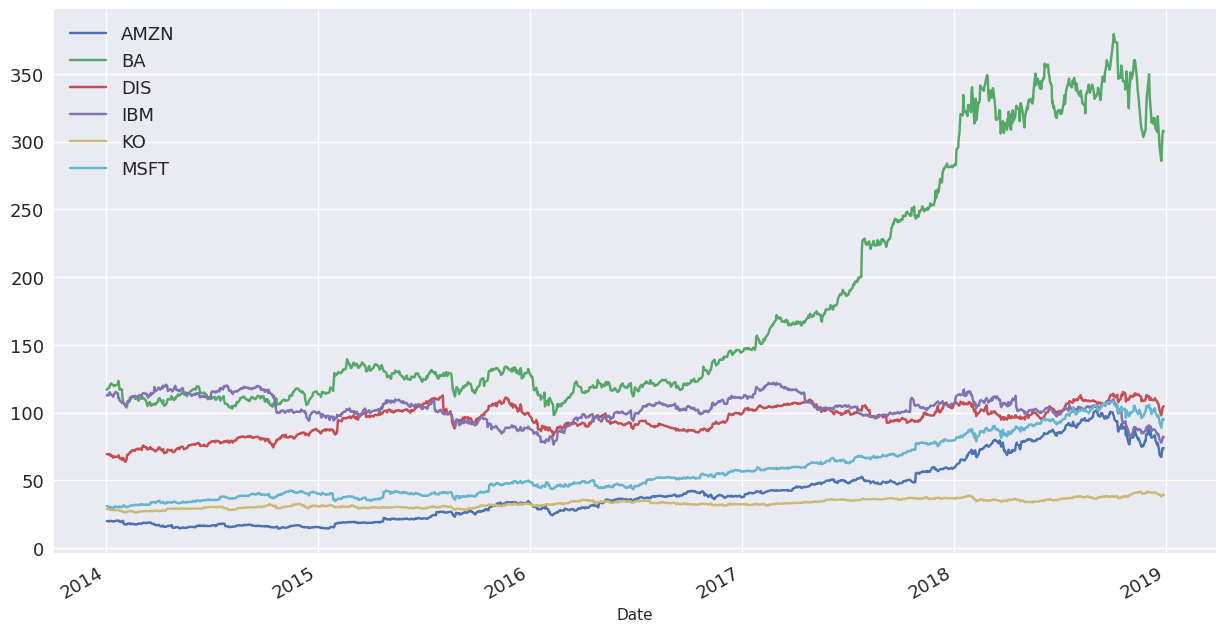

In [8]:
stocks.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [9]:
# Normalize the stocks
norm = stocks.div(stocks.iloc[0]).mul(100)
norm

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23
...,...,...,...,...,...,...
2018-12-21,346.12,253.35,146.68,71.29,137.48,298.10
2018-12-24,337.70,244.70,141.24,69.12,132.82,285.66
2018-12-26,369.60,261.15,148.95,71.58,135.65,305.17


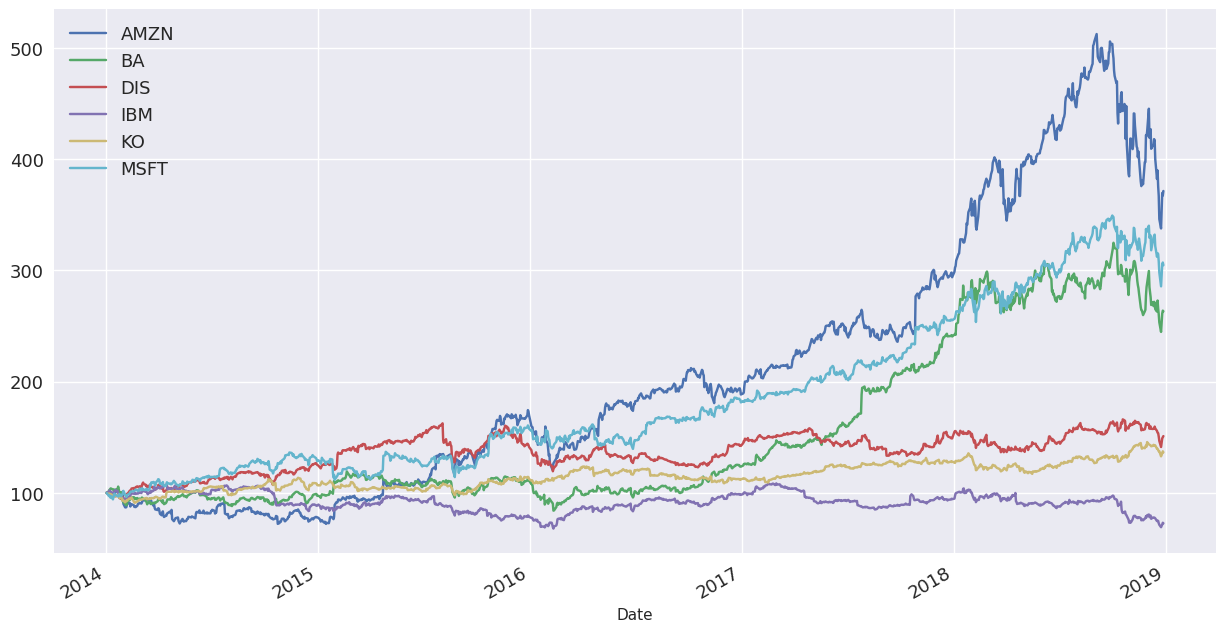

In [10]:
norm.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Creating a Price Weighted Index

In [11]:
stocks.head()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,116.81,69.34,112.50,28.72,31.06
2014-01-03,19.82,117.62,69.19,113.18,28.58,30.85
2014-01-06,19.68,118.30,68.93,112.79,28.45,30.20
2014-01-07,19.90,120.09,69.40,115.04,28.53,30.43
2014-01-08,20.10,120.35,68.38,113.98,28.22,29.89


In [12]:
norm.head()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23


In [13]:
stocks.sum(axis=1)

Date
2014-01-02   378.33
2014-01-03   379.24
2014-01-06   378.34
2014-01-07   383.40
2014-01-08   380.92
              ...  
2018-12-21   678.79
2018-12-24   655.60
2018-12-26   696.14
2018-12-27   702.28
2018-12-28   701.56
Length: 1257, dtype: float64

In [14]:
stocks.sum(axis=1).iloc[0]

np.float64(378.3295555114746)

In [15]:
stocks.sum(axis = 1).div(stocks.sum(axis = 1).iloc[0])

Date
2014-01-02   1.00
2014-01-03   1.00
2014-01-06   1.00
2014-01-07   1.01
2014-01-08   1.01
             ... 
2018-12-21   1.79
2018-12-24   1.73
2018-12-26   1.84
2018-12-27   1.86
2018-12-28   1.85
Length: 1257, dtype: float64

In [16]:
stocks.sum(axis = 1).div(stocks.sum(axis = 1).iloc[0]).mul(100)

Date
2014-01-02   100.00
2014-01-03   100.24
2014-01-06   100.00
2014-01-07   101.34
2014-01-08   100.68
              ...  
2018-12-21   179.42
2018-12-24   173.29
2018-12-26   184.00
2018-12-27   185.63
2018-12-28   185.44
Length: 1257, dtype: float64

In [18]:
# Creating an index of the combined stocks
norm["PWI"] = stocks.sum(axis = 1).div(stocks.sum(axis = 1).iloc[0]).mul(100)
norm

Ticker,AMZN,BA,DIS,IBM,KO,MSFT,PWI
Date,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.24
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.00
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.34
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.68
...,...,...,...,...,...,...,...
2018-12-21,346.12,253.35,146.68,71.29,137.48,298.10,179.42
2018-12-24,337.70,244.70,141.24,69.12,132.82,285.66,173.29
2018-12-26,369.60,261.15,148.95,71.58,135.65,305.17,184.00


In [27]:
weights_PWI = stocks.div(stocks.sum(axis = 1), axis =0)
weights_PWI

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.05,0.31,0.18,0.30,0.08,0.08
2014-01-03,0.05,0.31,0.18,0.30,0.08,0.08
2014-01-06,0.05,0.31,0.18,0.30,0.08,0.08
2014-01-07,0.05,0.31,0.18,0.30,0.07,0.08
2014-01-08,0.05,0.32,0.18,0.30,0.07,0.08
...,...,...,...,...,...,...
2018-12-21,0.10,0.44,0.15,0.12,0.06,0.14
2018-12-24,0.10,0.44,0.15,0.12,0.06,0.14
2018-12-26,0.11,0.44,0.15,0.12,0.06,0.14


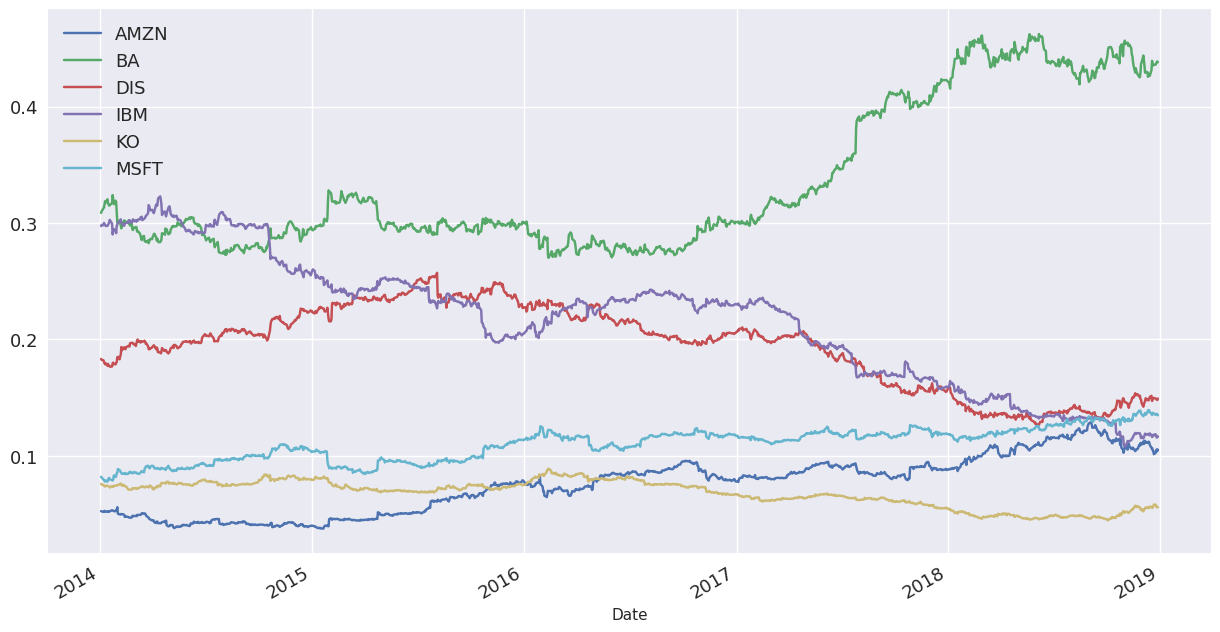

In [28]:
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Creating an Equal Weighted Index

In [29]:
stocks.head()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,116.81,69.34,112.50,28.72,31.06
2014-01-03,19.82,117.62,69.19,113.18,28.58,30.85
2014-01-06,19.68,118.30,68.93,112.79,28.45,30.20
2014-01-07,19.90,120.09,69.40,115.04,28.53,30.43
2014-01-08,20.10,120.35,68.38,113.98,28.22,29.89


In [30]:
norm.head()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT,PWI
Date,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.24
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.00
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.34
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.68


In [32]:
ret = stocks.pct_change().dropna()
ret

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01
...,...,...,...,...,...,...
2018-12-21,-0.06,-0.03,-0.03,-0.02,0.00,-0.03
2018-12-24,-0.02,-0.03,-0.04,-0.03,-0.03,-0.04
2018-12-26,0.09,0.07,0.05,0.04,0.02,0.07


In [39]:
ret["Mean_ret"] = ret.mean(axis = 1)
ret

Ticker,AMZN,BA,DIS,IBM,KO,MSFT,Mean_ret
Date,,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.01
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,-0.00
...,...,...,...,...,...,...,...
2018-12-21,-0.06,-0.03,-0.03,-0.02,0.00,-0.03,-0.03
2018-12-24,-0.02,-0.03,-0.04,-0.03,-0.03,-0.04,-0.03
2018-12-26,0.09,0.07,0.05,0.04,0.02,0.07,0.06


In [44]:
norm["EWI"] = ret.Mean_ret.add(1).cumprod().mul(100)
norm

Ticker,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI
Date,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,NaN
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.24,99.92
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.00,99.35
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.34,100.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.68,99.72
...,...,...,...,...,...,...,...,...
2018-12-21,346.12,253.35,146.68,71.29,137.48,298.10,179.42,195.55
2018-12-24,337.70,244.70,141.24,69.12,132.82,285.66,173.29,188.98
2018-12-26,369.60,261.15,148.95,71.58,135.65,305.17,184.00,199.73


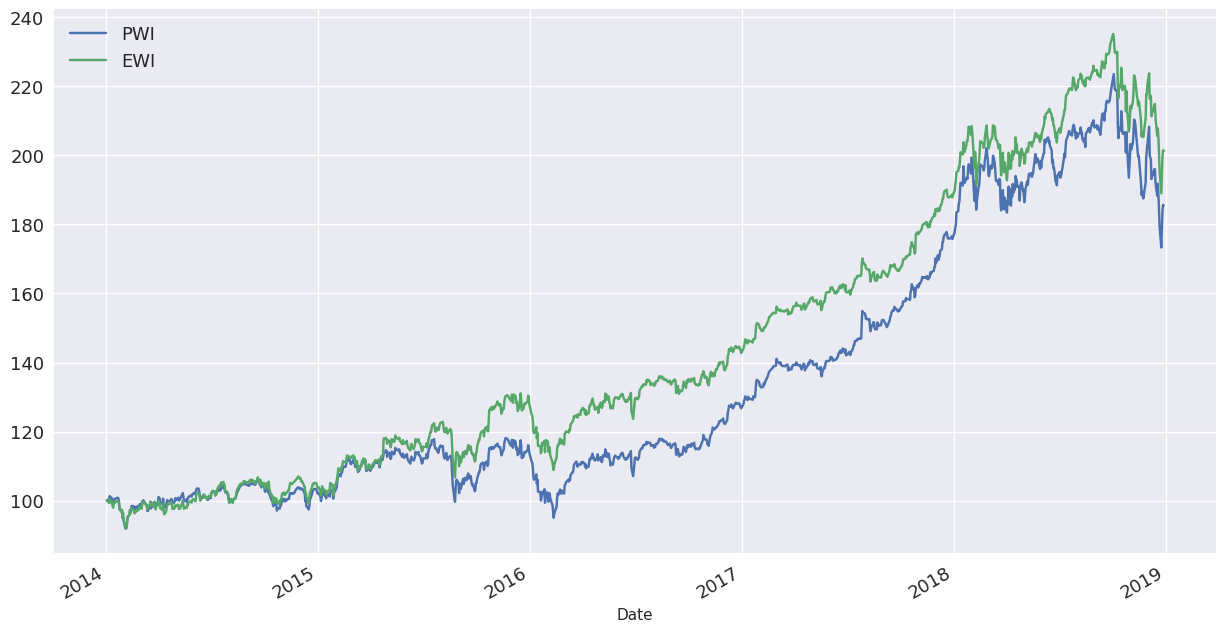

In [45]:
norm.iloc[:, -2:].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [47]:
# All stocks have equal weighting
weights_EWI = stocks.copy()
weights_EWI.iloc[:,:] = (1/6)
weights_EWI

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-03,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-06,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-07,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-08,0.17,0.17,0.17,0.17,0.17,0.17
...,...,...,...,...,...,...
2018-12-21,0.17,0.17,0.17,0.17,0.17,0.17
2018-12-24,0.17,0.17,0.17,0.17,0.17,0.17
2018-12-26,0.17,0.17,0.17,0.17,0.17,0.17


## Value Weighted Index

In [48]:
stocks.head()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,116.81,69.34,112.50,28.72,31.06
2014-01-03,19.82,117.62,69.19,113.18,28.58,30.85
2014-01-06,19.68,118.30,68.93,112.79,28.45,30.20
2014-01-07,19.90,120.09,69.40,115.04,28.53,30.43
2014-01-08,20.10,120.35,68.38,113.98,28.22,29.89


In [49]:
norm.head()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI
Date,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,NaN
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.24,99.92
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.00,99.35
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.34,100.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.68,99.72


In [51]:
listings = pd.read_csv("data/listings_clean.csv")
listings

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
0,A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
2,AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
3,AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
4,AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services
...,...,...,...,...,...,...,...,...
6847,ZUMZ,NASDAQ,Zumiez Inc.,26.72,681919062.56,2005,Consumer Services,Clothing/Shoe/Accessory Stores
6848,ZUO,NYSE,"Zuora, Inc.",19.79,2147266454.00,2018,Technology,Computer Software: Prepackaged Software
6849,ZYME,NYSE,Zymeworks Inc.,15.74,504078206.26,2017,Health Care,Major Pharmaceuticals
6850,ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.85,165399468.60,2015,Health Care,Major Pharmaceuticals


In [52]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852 entries, 0 to 6851
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      6852 non-null   object 
 1   Exchange    6852 non-null   object 
 2   Name        6852 non-null   object 
 3   Last_Price  6852 non-null   float64
 4   Market_Cap  5954 non-null   float64
 5   IPO_Year    6852 non-null   int64  
 6   Sector      5309 non-null   object 
 7   Industry    5309 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 428.4+ KB


In [53]:
listings.set_index("Symbol", inplace = True)

In [54]:
ticker = ["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"]
listings = listings.loc[ticker, ["Last_Price", "Market_Cap"]]
listings

,Last_Price,Market_Cap
Symbol,,
AMZN,1847.33,907413834783.70
BA,364.94,206002047212.28
DIS,117.16,210609322989.68
IBM,143.02,127268671933.12
KO,46.64,199393520886.56
MSFT,120.19,922123334074.74


In [57]:
# The total number of shares for each stock
listings["Shares"] = listings.Market_Cap.div(listings.Last_Price)
listings

,Last_Price,Market_Cap,Shares
Symbol,,,
AMZN,1847.33,907413834783.70,491202890.00
BA,364.94,206002047212.28,564481962.00
DIS,117.16,210609322989.68,1797621398.00
IBM,143.02,127268671933.12,889866256.00
KO,46.64,199393520886.56,4275161254.00
MSFT,120.19,922123334074.74,7672213446.00


In [59]:
# Calculating the market cap of each stock over time
mcap = stocks.mul(listings.Shares, axis = 1)
mcap

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,9774200924.02,65935978112.74,124639806044.68,100113776086.24,122800999743.72,238287882544.47
2014-01-03,9736623932.92,66394301014.35,124378361520.22,100712768396.07,122197008293.89,236684904919.41
2014-01-06,9667609424.70,66775444341.06,123904447889.48,100367431962.83,121623187469.07,231683130650.20
2014-01-07,9775674660.11,67788580762.86,124754187166.96,102369359473.20,121985536675.32,233478569196.05
2014-01-08,9871213607.23,67938137991.67,122923910918.58,101430448464.45,120626488640.87,229310382509.89
...,...,...,...,...,...,...
2018-12-21,33830369842.30,167047297919.87,182827540162.31,71371140825.77,168821118403.27,710343874414.17
2018-12-24,33007850842.84,161348335025.75,176038609112.18,69203096619.60,163107340207.06,680694941773.37
2018-12-26,36125515645.63,172192287091.65,185651876137.77,71660616208.94,166585263081.00,727193219272.60


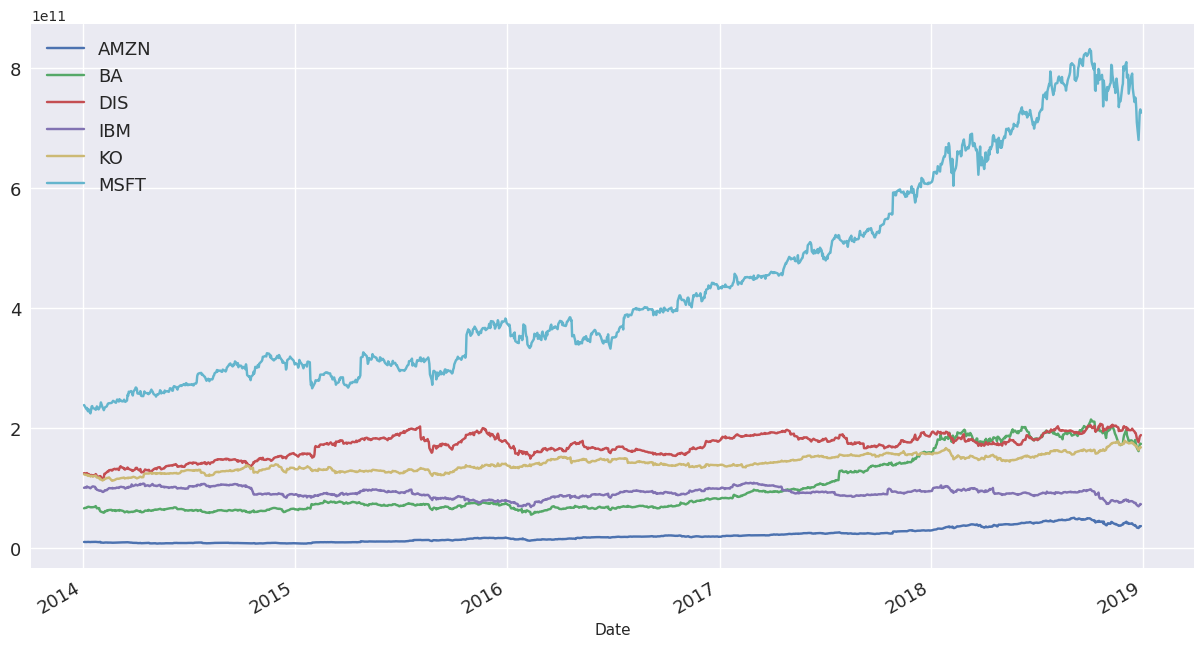

In [60]:
mcap.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

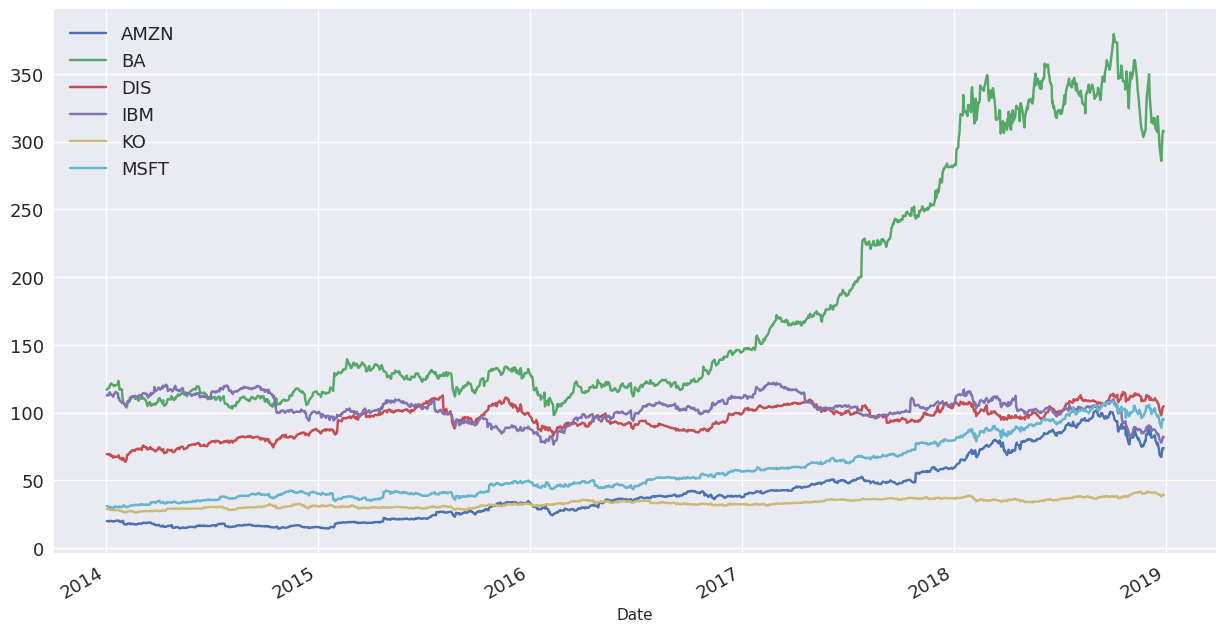

In [61]:
stocks.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [62]:
# The total market cap of the index!
mcap.sum(axis = 1)

Date
2014-01-02    661552643455.87
2014-01-03    660103968076.86
2014-01-06    654021251737.34
2014-01-07    660151907934.51
2014-01-08    652100582132.68
                   ...       
2018-12-21   1334241341567.69
2018-12-24   1283400173580.79
2018-12-26   1359408777437.59
2018-12-27   1370267426828.01
2018-12-28   1364254634515.06
Length: 1257, dtype: float64

In [69]:
# Weighting based on market cap!
weights_VWI = mcap.div(mcap.sum(axis = 1), axis = "index")
weights_VWI

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.01,0.10,0.19,0.15,0.19,0.36
2014-01-03,0.01,0.10,0.19,0.15,0.19,0.36
2014-01-06,0.01,0.10,0.19,0.15,0.19,0.35
2014-01-07,0.01,0.10,0.19,0.16,0.18,0.35
2014-01-08,0.02,0.10,0.19,0.16,0.18,0.35
...,...,...,...,...,...,...
2018-12-21,0.03,0.13,0.14,0.05,0.13,0.53
2018-12-24,0.03,0.13,0.14,0.05,0.13,0.53
2018-12-26,0.03,0.13,0.14,0.05,0.12,0.53


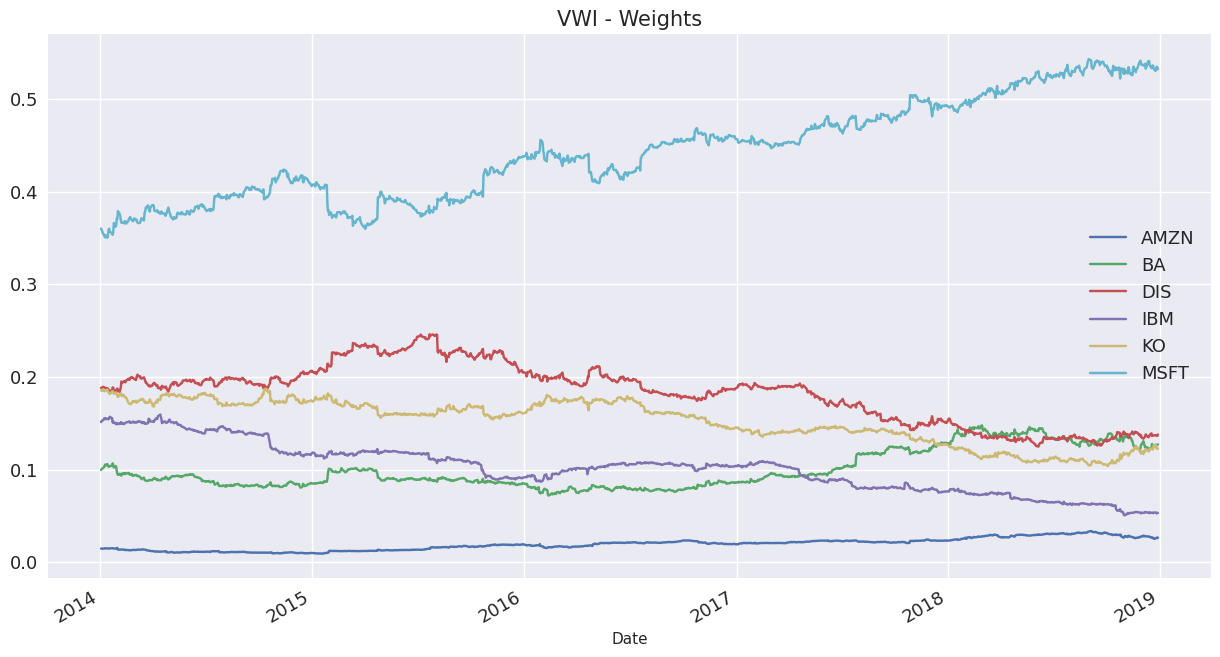

In [71]:
weights_VWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("VWI - Weights", fontsize = 15)
plt.show()

In [72]:
ret = stocks.pct_change().dropna()
ret

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01
...,...,...,...,...,...,...
2018-12-21,-0.06,-0.03,-0.03,-0.02,0.00,-0.03
2018-12-24,-0.02,-0.03,-0.04,-0.03,-0.03,-0.04
2018-12-26,0.09,0.07,0.05,0.04,0.02,0.07


In [78]:
weights_VWI.shift().dropna()

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,0.01,0.10,0.19,0.15,0.19,0.36
2014-01-06,0.01,0.10,0.19,0.15,0.19,0.36
2014-01-07,0.01,0.10,0.19,0.15,0.19,0.35
2014-01-08,0.01,0.10,0.19,0.16,0.18,0.35
2014-01-09,0.02,0.10,0.19,0.16,0.18,0.35
...,...,...,...,...,...,...
2018-12-21,0.03,0.13,0.14,0.05,0.12,0.54
2018-12-24,0.03,0.13,0.14,0.05,0.13,0.53
2018-12-26,0.03,0.13,0.14,0.05,0.13,0.53


In [84]:
norm['VWI'] = ret.mul(weights_VWI.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)
norm.fillna(100, inplace=True)
norm

Ticker,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI
Date,,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.24,99.92,99.78
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.00,99.35,98.86
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.34,100.41,99.79
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.68,99.72,98.57
...,...,...,...,...,...,...,...,...,...
2018-12-21,346.12,253.35,146.68,71.29,137.48,298.10,179.42,195.55,201.68
2018-12-24,337.70,244.70,141.24,69.12,132.82,285.66,173.29,188.98,194.00
2018-12-26,369.60,261.15,148.95,71.58,135.65,305.17,184.00,199.73,205.49


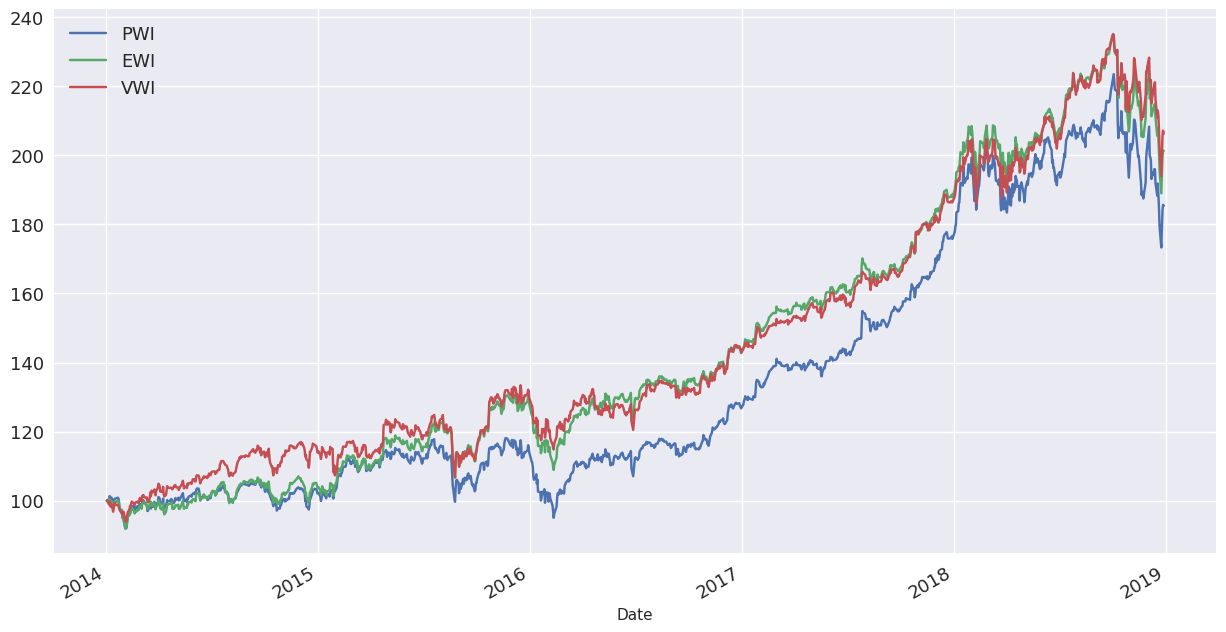

In [85]:
norm.iloc[:, -3:].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Weights comparison between index methods

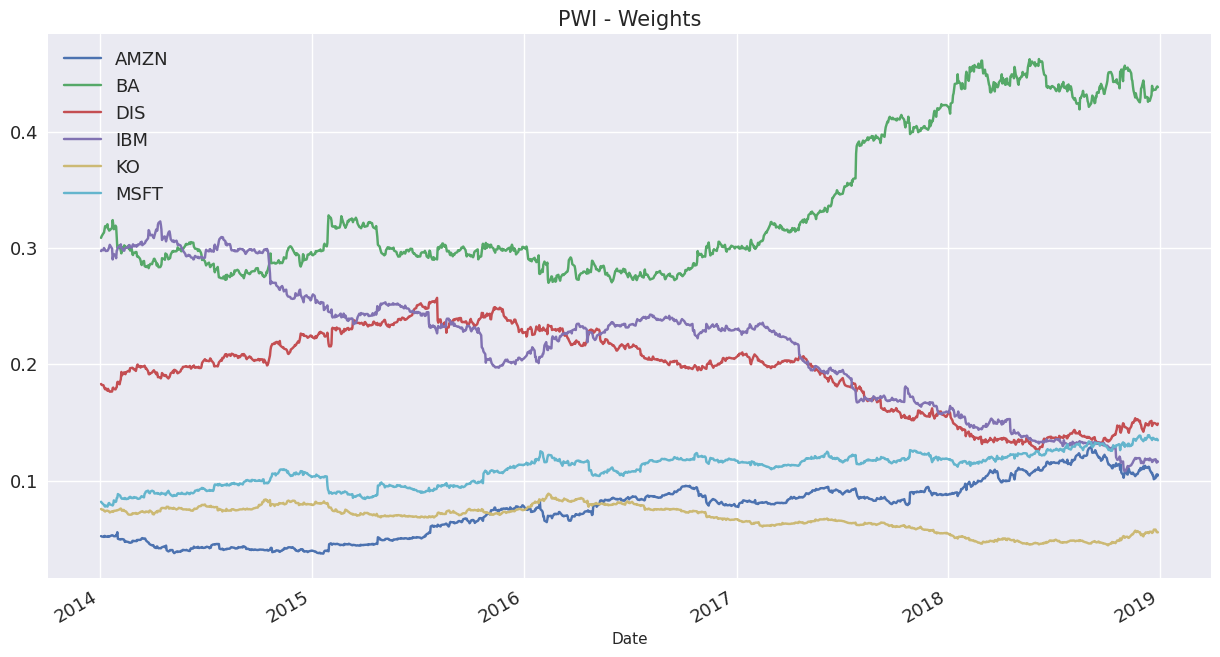

In [86]:
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.show()

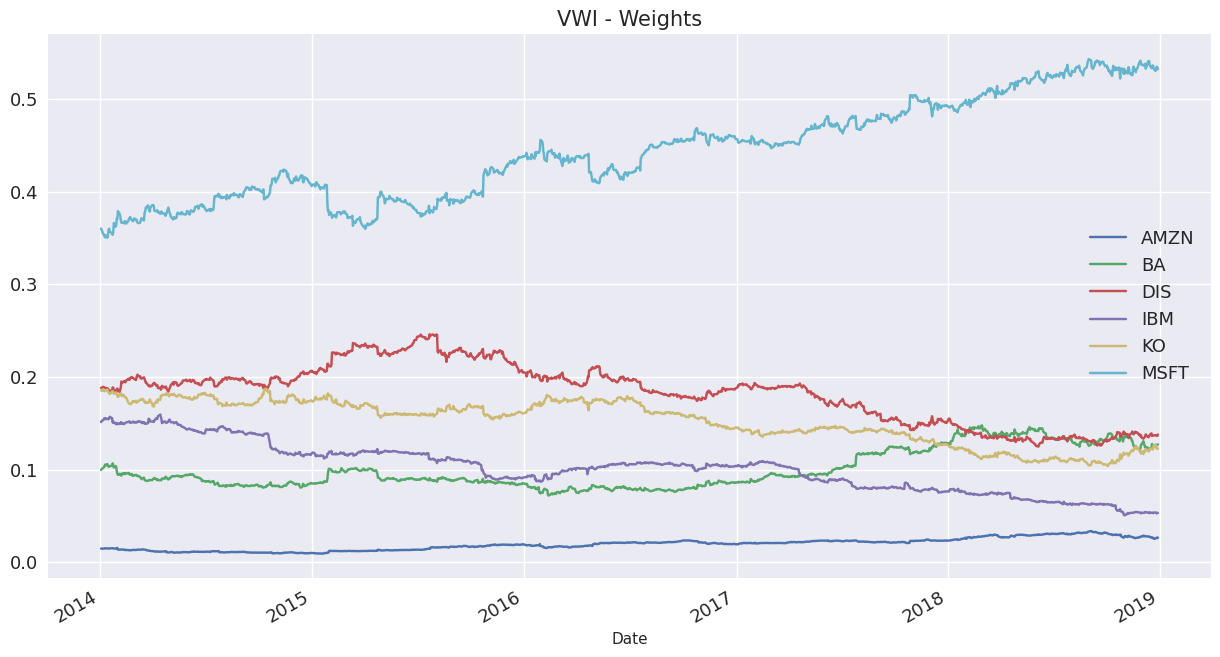

In [89]:
weights_VWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("VWI - Weights", fontsize = 15)
plt.show()

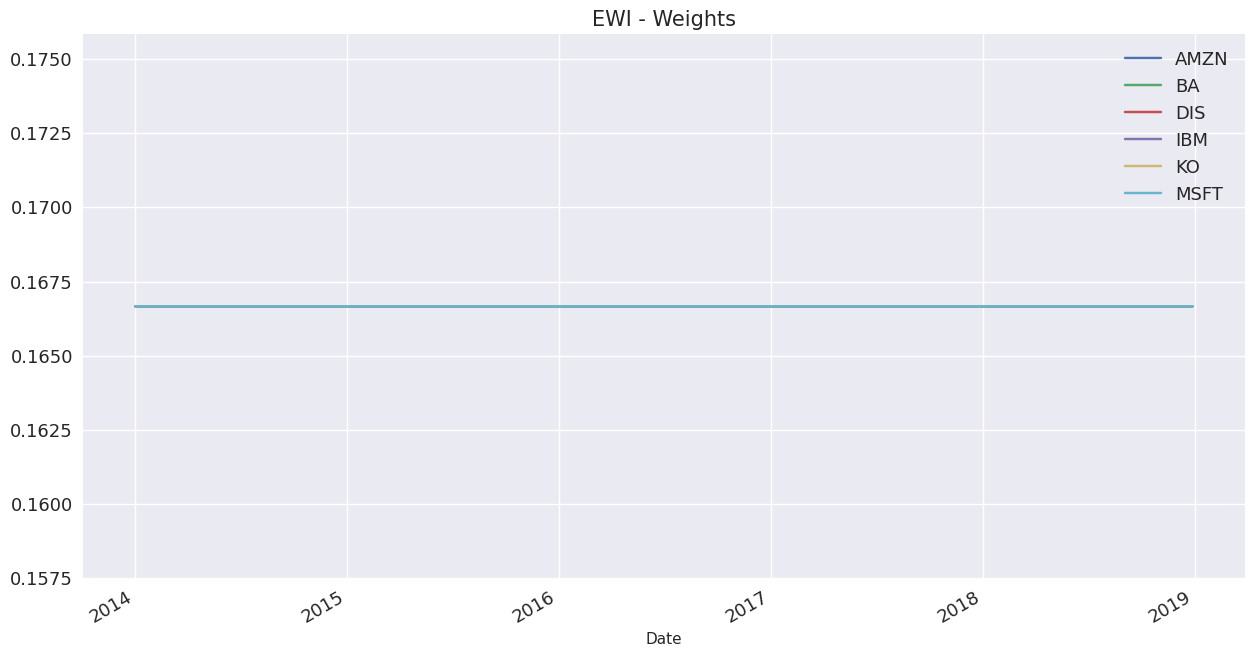

In [90]:
weights_EWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("EWI - Weights", fontsize = 15)
plt.show()

## Comparing Risk / Return of Stocks Versus Indexes

In [96]:
summary = norm.pct_change().dropna().agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary

,Return,Risk
Ticker,,
AMZN,0.00,0.02
BA,0.00,0.01
DIS,0.00,0.01
IBM,-0.00,0.01
KO,0.00,0.01
MSFT,0.00,0.01
PWI,0.00,0.01
EWI,0.00,0.01
VWI,0.00,0.01


In [109]:
# Annualized Risk and Return!
summary["Return"] = summary["Return"]*252
summary["Risk"] = summary["Risk"] * np.sqrt(252)

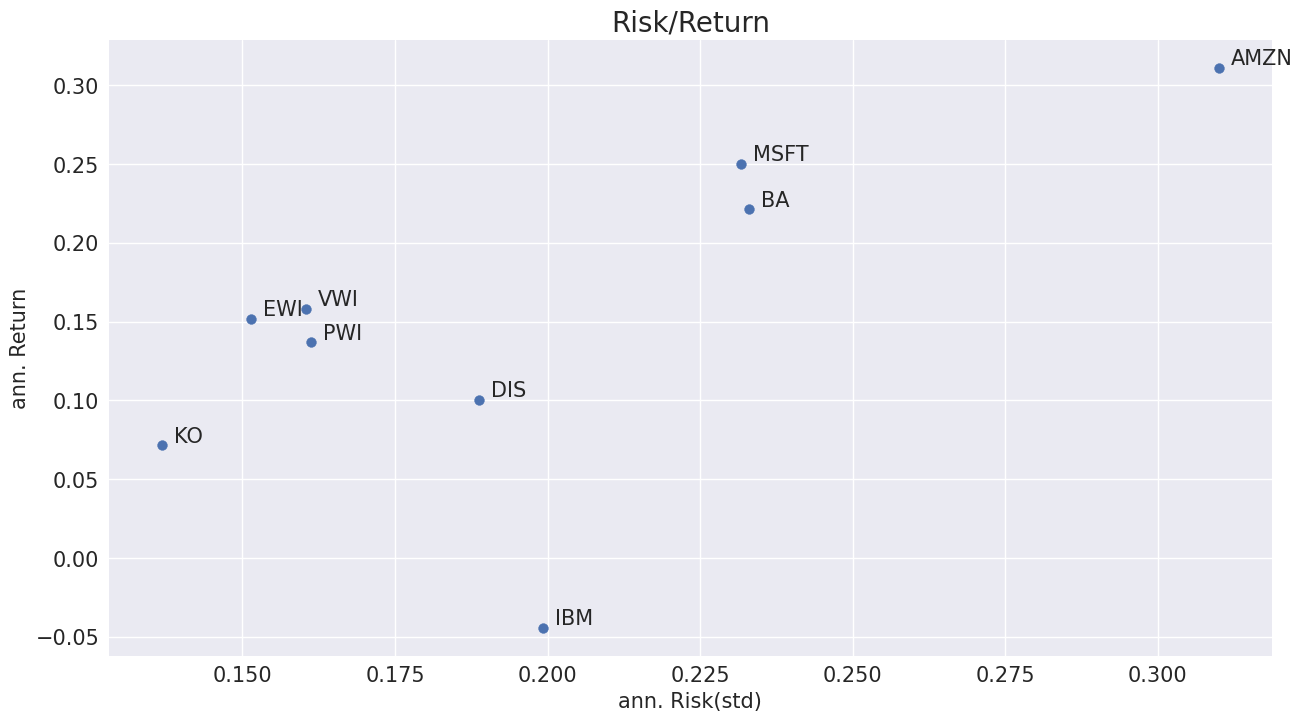

In [110]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15, 8), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), fontsize=15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show();

## Price Index vs Performance Index

In [145]:
stocks = pd.read_csv("data/index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])
stocks

Price      Adj Close                                  Close                \
Ticker          AMZN     BA    DIS    IBM    KO  MSFT  AMZN     BA    DIS   
Date                                                                        
2014-01-02     19.90 116.81  69.34 112.50 28.72 31.06 19.90 136.67  76.27   
2014-01-03     19.82 117.62  69.19 113.18 28.58 30.85 19.82 137.62  76.11   
2014-01-06     19.68 118.30  68.93 112.79 28.45 30.20 19.68 138.41  75.82   
2014-01-07     19.90 120.09  69.40 115.04 28.53 30.43 19.90 140.51  76.34   
2014-01-08     20.10 120.35  68.38 113.98 28.22 29.89 20.10 140.82  75.22   
...              ...    ...    ...    ...   ...   ...   ...    ...    ...   
2018-12-21     68.87 295.93 101.71  80.20 39.49 92.59 68.87 304.55 104.22   
2018-12-24     67.20 285.83  97.93  77.77 38.15 88.72 67.20 294.16 100.35   
2018-12-26     73.54 305.04 103.28  80.53 38.97 94.78 73.54 313.93 105.83   
2018-12-27     73.08 308.16 103.95  82.26 39.46 95.37 73.08 317.14 106.52   
2018-12-28     73.90 307.43 104.71  81.72 39.18 94.62 73.90 316.38 107.30   

Price              ...   Open                         Volume           \
Ticker        IBM  ...    DIS    IBM    KO   MSFT       AMZN       BA   
Date               ...                                                  
2014-01-02 177.37  ...  76.04 178.98 41.12  37.35   42756000  3366700   
2014-01-03 178.43  ...  76.30 177.66 40.68  37.20   44204000  3177400   
2014-01-06 177.82  ...  76.53 178.92 40.48  36.85   63412000  4196500   
2014-01-07 181.37  ...  76.12 178.19 40.48  36.33   38320000  4238500   
2014-01-08 179.70  ...  76.13 181.00 40.44  36.00   46330000  4236100   
...           ...  ...    ...    ...   ...    ...        ...      ...   
2018-12-21 106.06  ... 106.47 107.55 47.26 101.63  272806000  7641700   
2018-12-24 102.84  ... 103.23 105.07 47.62  97.68  144400000  3435300   
2018-12-26 106.49  ... 100.49 103.25 45.88  95.14  208236000  4843400   
2018-12-27 108.78  ... 104.41 105.15 46.74  99.30  194440000  4341100   
2018-12-28 108.06  ... 107.28 109.20 47.89 102.09  176580000  3725200   

Price                                                
Ticker           DIS       IBM        KO       MSFT  
Date                                                 
2014-01-02   5200900   4755639  12698600   30632200  
2014-01-03   4060700   4250107  10403400   31134800  
2014-01-06   6816200   4254919  11036300   43603700  
2014-01-07   4494900   6205186  11872300   35802800  
2014-01-08  10900300   4815470  15339600   59971700  
...              ...       ...       ...        ...  
2018-12-21  15530600  10864279  32477700  111242100  
2018-12-24   7133000   3997184  10733700   43935200  
2018-12-26   9422800   6951507  14342600   51634800  
2018-12-27   8201400   6323698  16966500   49498500  
2018-12-28   7620500   5352905  13218200   38196300  

[1257 rows x 36 columns]

In [146]:
stocks.columns

MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'DIS'),
            ('Adj Close',  'IBM'),
            ('Adj Close',   'KO'),
            ('Adj Close', 'MSFT'),
            (    'Close', 'AMZN'),
            (    'Close',   'BA'),
            (    'Close',  'DIS'),
            (    'Close',  'IBM'),
            (    'Close',   'KO'),
            (    'Close', 'MSFT'),
            (     'High', 'AMZN'),
            (     'High',   'BA'),
            (     'High',  'DIS'),
            (     'High',  'IBM'),
            (     'High',   'KO'),
            (     'High', 'MSFT'),
            (      'Low', 'AMZN'),
            (      'Low',   'BA'),
            (      'Low',  'DIS'),
            (      'Low',  'IBM'),
            (      'Low',   'KO'),
            (      'Low', 'MSFT'),
            (     'Open', 'AMZN'),
            (     'Open',   'BA'),
            (     'Open',  'DIS'),
            (     'Open',  'IBM'),
            (     'O

In [147]:
adj_close = stocks["Adj Close"].copy()
adj_close

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,116.81,69.34,112.50,28.72,31.06
2014-01-03,19.82,117.62,69.19,113.18,28.58,30.85
2014-01-06,19.68,118.30,68.93,112.79,28.45,30.20
2014-01-07,19.90,120.09,69.40,115.04,28.53,30.43
2014-01-08,20.10,120.35,68.38,113.98,28.22,29.89
...,...,...,...,...,...,...
2018-12-21,68.87,295.93,101.71,80.20,39.49,92.59
2018-12-24,67.20,285.83,97.93,77.77,38.15,88.72
2018-12-26,73.54,305.04,103.28,80.53,38.97,94.78


In [149]:
# Returns using the adjusted close
total_return = adj_close.pct_change().dropna()
total_return

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01
...,...,...,...,...,...,...
2018-12-21,-0.06,-0.03,-0.03,-0.02,0.00,-0.03
2018-12-24,-0.02,-0.03,-0.04,-0.03,-0.03,-0.04
2018-12-26,0.09,0.07,0.05,0.04,0.02,0.07


In [150]:
close = stocks["Close"].copy()
close

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76
...,...,...,...,...,...,...
2018-12-21,68.87,304.55,104.22,106.06,47.57,98.23
2018-12-24,67.20,294.16,100.35,102.84,45.96,94.13
2018-12-26,73.54,313.93,105.83,106.49,46.94,100.56


In [152]:
# Price weighted
weights = close.div(close.sum(axis = 1), axis = 0)
weights

Ticker,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.04,0.28,0.16,0.36,0.08,0.08
2014-01-03,0.04,0.28,0.16,0.36,0.08,0.08
2014-01-06,0.04,0.28,0.16,0.36,0.08,0.07
2014-01-07,0.04,0.28,0.15,0.37,0.08,0.07
2014-01-08,0.04,0.29,0.15,0.37,0.08,0.07
...,...,...,...,...,...,...
2018-12-21,0.09,0.42,0.14,0.15,0.07,0.13
2018-12-24,0.10,0.42,0.14,0.15,0.07,0.13
2018-12-26,0.10,0.42,0.14,0.14,0.06,0.13


In [158]:
norm["PWI_perf"] = 100
norm.iloc[1:, -1] = total_return.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)
norm

/tmp/ipykernel_493929/403432690.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[100.27145534 100.02099739 101.41163939 ... 172.70732711 174.30934655
 174.07869458]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm.iloc[1:, -1] = total_return.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)


Ticker,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI,PWI_perf
Date,,,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.24,99.92,99.78,100.27
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.00,99.35,98.86,100.02
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.34,100.41,99.79,101.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.68,99.72,98.57,100.72
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,346.12,253.35,146.68,71.29,137.48,298.10,179.42,195.55,201.68,168.60
2018-12-24,337.70,244.70,141.24,69.12,132.82,285.66,173.29,188.98,194.00,162.85
2018-12-26,369.60,261.15,148.95,71.58,135.65,305.17,184.00,199.73,205.49,172.71


In [ ]:
norm["PWI_perf"] = total_return.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [159]:
summary = norm.pct_change().dropna().agg(["mean", "std"]).T
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)
summary

,mean,std
Ticker,,
AMZN,0.31,0.31
BA,0.22,0.23
DIS,0.10,0.19
IBM,-0.04,0.20
KO,0.07,0.14
MSFT,0.25,0.23
PWI,0.14,0.16
EWI,0.15,0.15
VWI,0.16,0.16


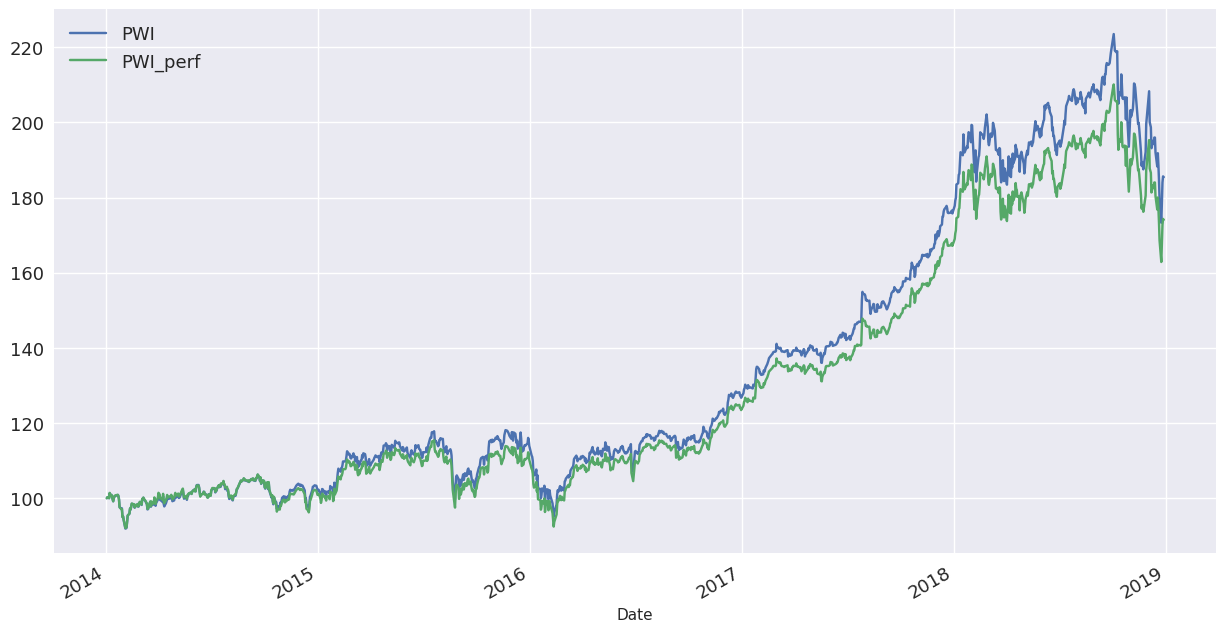

In [160]:
norm.iloc[:, [6, 9]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()